In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/h1n1_vaccine_prediction.csv")

In [ ]:
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data=data.dropna()


In [ ]:
data.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [ ]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [ ]:
x=data.drop(["h1n1_vaccine"],axis=1)
y=data["h1n1_vaccine"]

In [ ]:
x

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0


In [ ]:
y

0        0
1        0
7        1
9        0
10       1
        ..
26697    0
26699    0
26701    0
26703    0
26706    0
Name: h1n1_vaccine, Length: 11794, dtype: int64

In [ ]:
X=pd.get_dummies(x)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               11794 non-null  int64  
 1   h1n1_worry                              11794 non-null  float64
 2   h1n1_awareness                          11794 non-null  float64
 3   antiviral_medication                    11794 non-null  float64
 4   contact_avoidance                       11794 non-null  float64
 5   bought_face_mask                        11794 non-null  float64
 6   wash_hands_frequently                   11794 non-null  float64
 7   avoid_large_gatherings                  11794 non-null  float64
 8   reduced_outside_home_cont               11794 non-null  float64
 9   avoid_touch_face                        11794 non-null  float64
 10  dr_recc_h1n1_vacc                       11794 non-null  fl

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pre=model.predict(x_test)
pre


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(x_test)

array([[0.84904861, 0.15095139],
       [0.83568781, 0.16431219],
       [0.91676897, 0.08323103],
       ...,
       [0.77997496, 0.22002504],
       [0.78100969, 0.21899031],
       [0.74203745, 0.25796255]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
ac=accuracy_score(y_test,pre)
ac

0.794167514411665

In [ ]:
confusion_matrix(y_test,pre)

array([[751,  64],
       [157, 208]])

In [ ]:
cls=classification_report(y_test,pre)
cls

'              precision    recall  f1-score   support\n\n           0       0.83      0.92      0.87       815\n           1       0.76      0.57      0.65       365\n\n    accuracy                           0.81      1180\n   macro avg       0.80      0.75      0.76      1180\nweighted avg       0.81      0.81      0.80      1180\n'

<function matplotlib.pyplot.show>

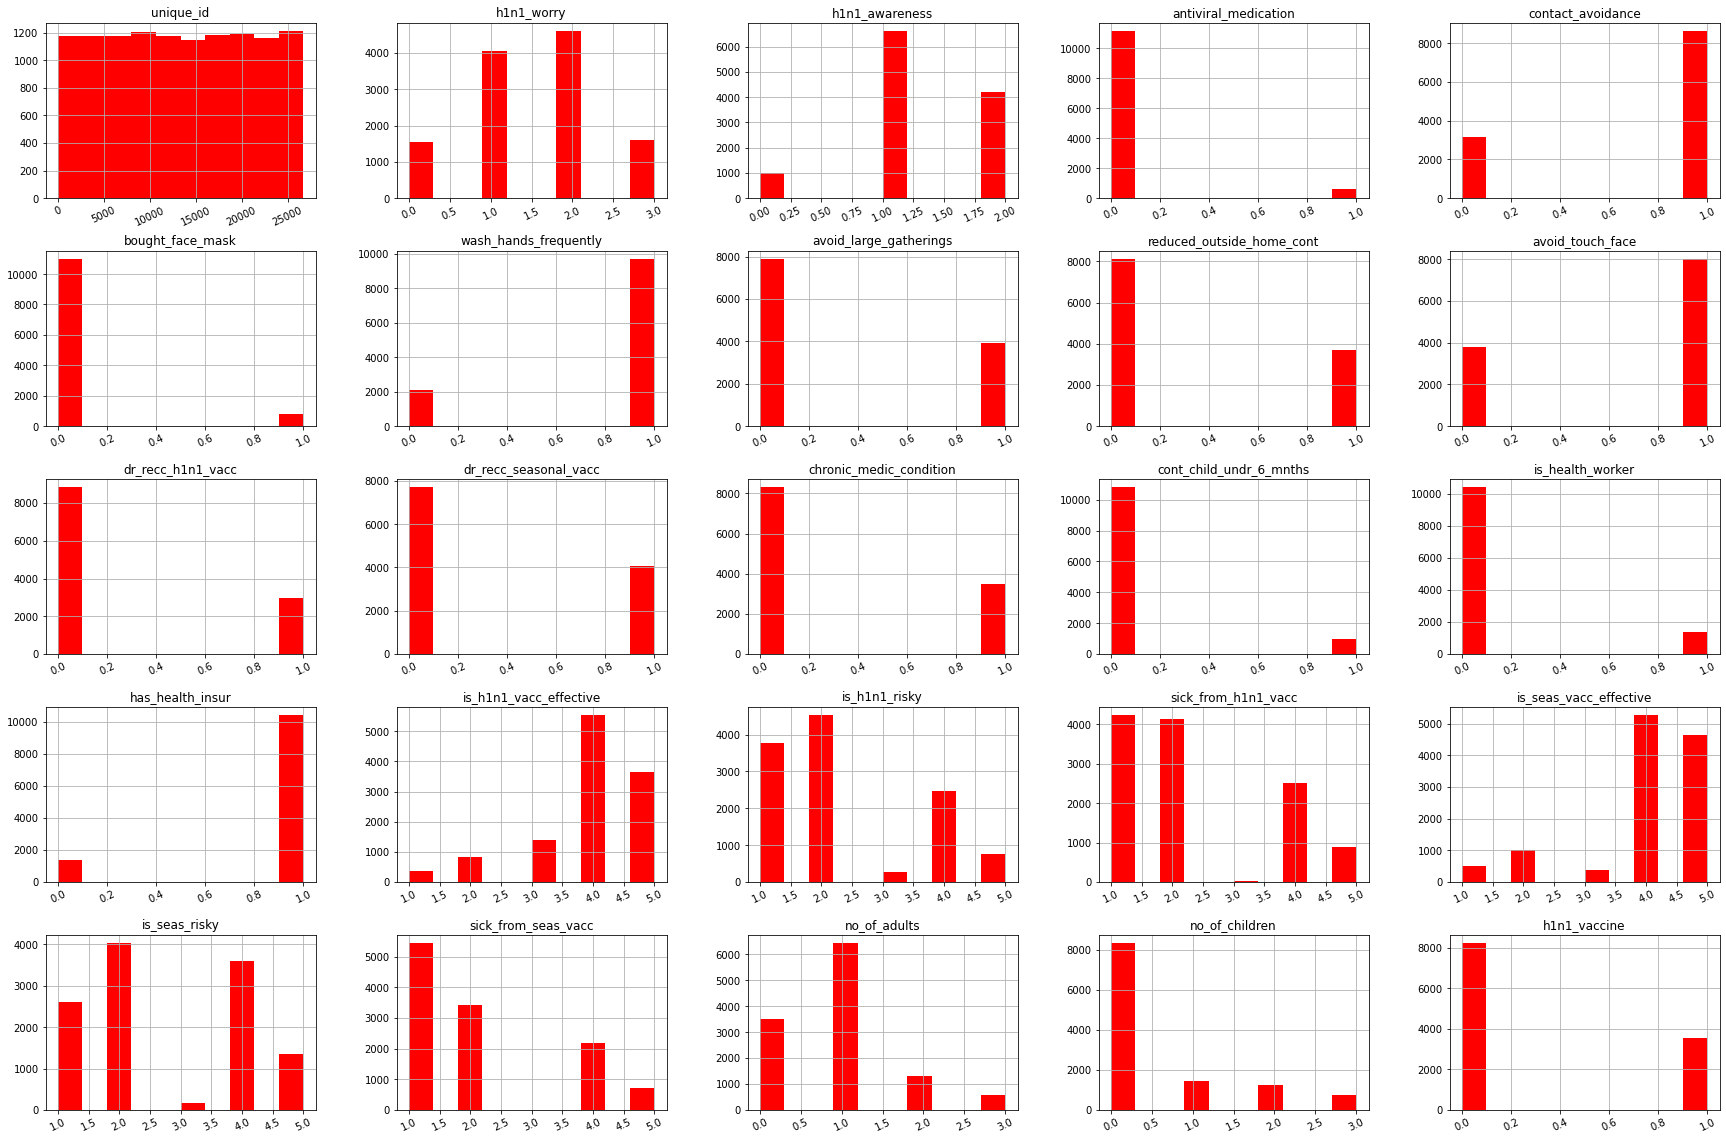

In [ ]:
data.hist(xrot=25,figsize=(30,20),color="red")
plt.show

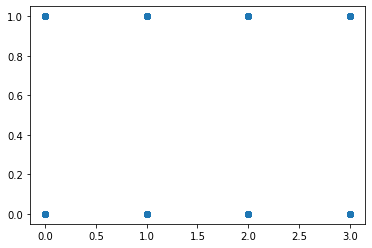

In [ ]:
plt.scatter(data["no_of_adults"],data["h1n1_vaccine"])

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
from matplotlib.mathtext import SsGlue
s= SGDClassifier(loss = 'log', random_state=0)

In [ ]:
d = s.fit(x_train, y_train)


In [ ]:
sgd = d.predict_proba(x_test)[:,1]

In [ ]:
pre_sgd = d.predict(x_test)

In [ ]:
acc_sgd = accuracy_score(y_test,pre_sgd)

In [ ]:
acc_sgd

0.6898305084745763

In [ ]:
confusion_matrix(y_test,pre_sgd)

array([[810,   5],
       [361,   4]])

In [ ]:
sgd_classifier = classification_report(y_test,pre_sgd)

In [ ]:
sgd_classifier

'              precision    recall  f1-score   support\n\n           0       0.69      0.99      0.82       815\n           1       0.44      0.01      0.02       365\n\n    accuracy                           0.69      1180\n   macro avg       0.57      0.50      0.42      1180\nweighted avg       0.62      0.69      0.57      1180\n'

In [ ]:
d = pd.DataFrame()
d['Model Name'] = ['MLE','SGD']
d['performance'] = [ac,acc_sgd]
d

,Model Name,performance
0,MLE,0.812712
1,SGD,0.689831
